In [158]:
import pandas as pd
from ipyleaflet import *
from branca.colormap import linear
import geopandas as gpd
import json
import pandas
from colour import Color
from pandas_profiling import ProfileReport
import numpy as np
from ipywidgets import *
import seaborn as sns
import sklearn as skl

# Récupération des données

In [123]:
# 1989-01-01 and 2020-12-31
#df = pd.read_csv(r'C:\Users\matth\OneDrive - GENES\ENSAE 2A\Python pour le data scientist/ged211.csv')
df = pd.read_csv('../UCDP.csv')
df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18 00:00:00.000,0,0,0,4,4,4,0,700,NaN
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-24 00:00:00.000,0,0,0,600,600,600,600,700,NaN
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-02-05 00:00:00.000,0,0,0,2,2,2,0,700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261859,15525,MZM-1989-3-1347-4,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,1989-03-24 00:00:00.000,0,0,9,0,9,9,9,NaN,NaN
261860,15524,MZM-1989-3-1347-16,1989,1,Clear,3,498,562,Renamo - Civilians,498,...,1989-07-15 00:00:00.000,0,0,9,0,9,9,9,NaN,NaN
261861,15245,MZM-1990-3-1347-18,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,1990-06-10 00:00:00.000,0,0,7,0,7,7,7,NaN,NaN
261862,15516,MZM-1990-3-1347-28,1990,1,Clear,3,498,562,Renamo - Civilians,498,...,1990-11-23 00:00:00.000,0,0,1,0,1,1,1,NaN,NaN


In [21]:
# On récupére une base de donnée comprenant une liste de données sur les pays du monde
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Statistiques descriptives

In [5]:
df['best'].describe()

count    261864.000000
mean         10.275128
std         222.556417
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max       48183.000000
Name: best, dtype: float64

In [12]:
df_visu_conflit = df[['year','type_of_violence', 'conflict_new_id']].groupby(['year','type_of_violence']).nunique()
df_visu_conflit.columns = ['year1','type1','nombre_conflits']
df_visu_conflit = df_visu_conflit.drop(['year1','type1'], axis=1)
df_visu_conflit.reset_index()
df_visu_conflit

In [13]:
df_visu_unique_conflit = df.drop_duplicates(subset=['conflict_new_id','year'])

In [14]:
#nombre de nouveaux conflits par type de violence
sns.histplot(data=df_visu_unique_conflit,x='year', hue='type_of_violence', multiple='stack', discrete=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='Count'>

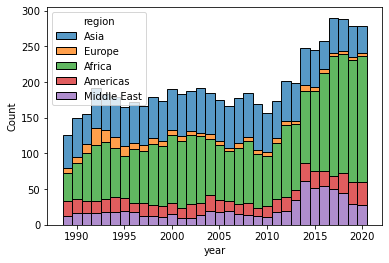

In [66]:
#nombre de conflits par région (densité)
sns.histplot(data=df_visu_unique_conflit,x='year', hue='region', multiple='stack', discrete=True)

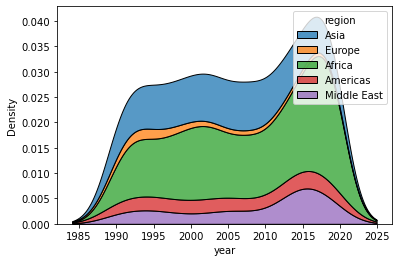

In [65]:
#nombre de conflits par région (densité)
sns.kdeplot(data=df_visu_unique_conflit,x='year', hue='region', multiple='stack')

In [70]:
#nombre de morts par région (area plot)
df_morts_region = df.pivot_table(values='best', index='year', columns='region', aggfunc=sum)
df_morts_region

region,Africa,Americas,Asia,Europe,Middle East
year,,,,,
1989,40608,9453,14420,669,1541
1990,72844,3618,14648,462,3739
1991,33926,3039,17786,3804,25585
1992,18881,3325,19649,27917,2834
1993,30714,1475,10670,9618,3409
1994,551974,2351,13472,5168,6906
1995,19389,1476,14692,12763,5019
1996,48741,1624,13785,2777,4653
1997,42008,1135,13379,94,4944


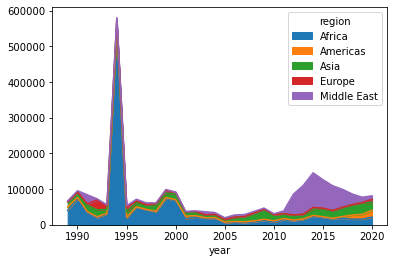

In [71]:
df_morts_region.plot.area()

# Exploration graphique

In [17]:
df_map = df[['id','year', 'where_coordinates', 'latitude', 'longitude', 'country','best','type_of_violence', 'side_a', 'side_b', 'source_headline']]
df_map

,id,year,where_coordinates,latitude,longitude,country,best,type_of_violence,side_a,side_b,source_headline
0,244657,2017,Kabul city,34.531094,69.162796,Afghanistan,6,1,Government of Iraq,IS,Attackers target Shiite mosque in Afghanistan'...
1,132140,1989,Nangarhar province,34.333330,70.416670,Afghanistan,6,1,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,NaN
2,130364,1989,Kunduz province,36.750000,68.750000,Afghanistan,4,1,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,NaN
3,130359,1989,Salang pass,35.315833,69.038889,Afghanistan,600,1,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,NaN
4,133883,1989,Kabul city,34.531094,69.162796,Afghanistan,2,1,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...
261859,15525,1989,Chipinge district,-20.500000,32.500000,Zimbabwe (Rhodesia),9,3,Renamo,Civilians,NaN
261860,15524,1989,"Eastern Zimbabwe, near the Mozambique border",-19.000000,32.500000,Zimbabwe (Rhodesia),9,3,Renamo,Civilians,NaN
261861,15245,1990,Nyamaropa village,-18.000000,32.833333,Zimbabwe (Rhodesia),7,3,Renamo,Civilians,NaN
261862,15516,1990,"Eastern Zimbabwe, near the Mozambique border",-19.000000,32.500000,Zimbabwe (Rhodesia),1,3,Renamo,Civilians,NaN


In [18]:
ProfileReport(df_map, title="UCDP Project").to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Couleurs dans l'ordre croissant 0-10, 10-30, 30-50,50-100,100-400,400- 
def colors_count(count):
    
    colors = ['#f1c40f','#f39c12','#e67e22','#d35400','#e74c3c','#c0392b']
    if count < 11:
        return colors[0]
    elif count < 31:
        return colors[1]
    elif count < 51: 
        return colors[2]
    elif count < 101:
        return colors[3]
    elif count < 401:
        return colors[4]
    else:
        return colors[5]

def map_density(year=1989,type_event=0):

    densityMap = Map(basemap=basemaps.CartoDB.Positron,zoom=2, close_popup_on_click=False)
    
    if type_event == 0:
        data_year = df_map[df_map['year'] == year].country.value_counts()
    else:
        data_year = df_map[df_map['year'] == year][df_map['type_of_violence'] == type_event].country.value_counts()
    
    # On inclue une légende
    legend = LegendControl({'Entre 0 et 10 événements':'#f1c40f', 
                            'Entre 11 et 30 événements':'#f39c12', 
                            'Entre 31 et 50 événements':'#e67e22',
                           'Entre 51 et 100 événements' : '#d35400',
                           'Entre 101 et 400 événements' :'#e74c3c',
                           'Plus de 400 événements' :'#c0392b'}, name="Légende", position="bottomright")
    densityMap.add_control(legend)

    # On affiche la couleur adapté au nombre d'événement 
    for country,count in data_year.iteritems():
        geo_country = countries[countries["name"] == country]
        geodata = GeoData(geo_dataframe = geo_country, 
     style={"color": "black", "fillColor":colors_count(count), "opacity":0.03, "weight":1.9, "dashArray":"2", 
            "fillOpacity":0.6},name = "Countries")
        
        densityMap.add_layer(geodata)
    
    return densityMap

# Création des widgets pour rendre la carte interactive
interact(map_density,
         year=widgets.Dropdown(options=[i for i in range(1989,2021,1)], description='Année : '),
         type_event=widgets.Dropdown(options=[('Tous les événements', 0),
                                              ('Conflit impliquant au moins un état', 1), 
                                              ('Conflit entre des entités non-étatiques', 2), 
                                              ('Conflit visant des civils', 3)], description='Type :'))

interactive(children=(Dropdown(description='Année : ', options=(1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996…

<function __main__.map_density(year=1989, type_event=0)>

In [23]:
# Icone en forme d'éclair pour les conflits impliquant deux groupes
# Icone en forme de bombe pour les attaques visant les civils
icon = [AwesomeIcon(name='flash', icon_color='white'),
        AwesomeIcon(name='flash', icon_color='white'),
        AwesomeIcon(name='bomb', icon_color='white')]


# Couleurs dans l'ordre croissant
def colors_fatalities(fatalities):
    
    colors = ['green', 'orange','red','darkred','black']
    
    if fatalities == 0:
        return colors[0]
    elif fatalities < 11:
        return colors[1]
    elif fatalities < 41:
        return colors[2]
    elif fatalities < 101: 
        return colors[3]
    else:
        return colors[4]


    
def map_event(year=1,type_event=0,number_event=0.1,country='Tous'):

    clusterMap = Map(basemap=basemaps.CartoDB.Positron,zoom=2, close_popup_on_click=False)
    
    # On inclue une légende
    legend = LegendControl({'Aucun blessé':'green', 
                            'Entre 0 et 10 décés ':'orange', 
                            'Entre 11 et 40 décés':'red',
                           'Entre 41 et 100 décés' : 'darkred',
                           'Plus de 100 décés' :'black'}, name="Légende", position="bottomright")
    clusterMap.add_control(legend)
    
    # On stocke tous les marqueurs dans une liste
    markers_custom=[]
    
    # On sélectionne le pays si sélectionné
    if country != 'Tous':
        data_temp = df_map[df_map['year'] == year][df_map['country'] == country]
    else: 
        data_temp = df_map[df_map['year'] == year]
    
    if type_event == 0:
        data = data_temp.sample(frac=number_event)
    else:
        data = data_temp[df_map['type_of_violence'] == type_event].sample(frac=number_event)
    
    # On crée tous les marqueurs 
    for index,event in data.iterrows():

        # Création du message qui s'affiche en cliquant sur l'icone
        message = HTML()
        message.value = "<b>Localisation :</b> " + str(event.where_coordinates) + "<br /> <b>Nombre de morts :</b> " + str(event.best)
        if event.type_of_violence == 3:
            message.value += "<br /> <b> Attaque effectuée par : </b>" + event.side_a
            current_icon = AwesomeIcon(name='bomb', marker_color=colors_fatalities(event.best))
        else:
            message.value += "<br /> <b> Entité impliquée : </b>" + event.side_a + " / " + event.side_b
            current_icon = AwesomeIcon(name='flash', marker_color=colors_fatalities(event.best))
        
        
        # Création du marqueur au bon endroit avec la bonne icone
        marker = Marker(location=(event.latitude,event.longitude), draggable=False, icon=current_icon)

        
        marker.popup = message
    
        markers_custom.append(marker)
    
    # On affiche tous les événements sous forme de cluster
    clusterMap.add_layer(MarkerCluster(markers=markers_custom))
    
    return clusterMap

# Création des widgets pour rendre la carte interactive
interact(map_event,
         year=widgets.Dropdown(options=[i for i in range(1989,2021,1)], description='Année : '),
         type_event=widgets.Dropdown(options=[('Tous les événements', 0),
                                              ('Conflit impliquant au moins un état', 1), 
                                              ('Conflit entre des entités non-étatiques', 2), 
                                              ('Conflit visant des civils', 3)], description='Type :'),
         number_event=widgets.Dropdown(options=[('10% des événements de l\'année', 0.1),
                                                ('30% des événements de l\'année', 0.3), 
                                                ('50% des événements de l\'année (possiblement long)', 0.5), 
                                                ('80% des événements de l\'année (possiblement long)', 0.8),
                                               ('100% des événements de l\'année (possiblement long)', 1)], description='Afficher : '),
         country=widgets.Dropdown(options=['Tous'] + [name for name in countries.name.values], description='Pays : '))

interactive(children=(Dropdown(description='Année : ', options=(1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996…

<function __main__.map_event(year=1, type_event=0, number_event=0.1, country='Tous')>

# Modélisation


In [157]:
df_regression = pd.read_csv('../df_regression.csv')
df_regression

,country,year,ratio,Croissance PIB,PIB/hab,Population,EVI,polity2
0,Afghanistan,2017.0,0.199614,2.647003,575.707053,36296111.0,38.267334,-1.0
1,Algeria,2017.0,0.000777,1.300000,4192.335033,41389174.0,14.174278,2.0
2,Angola,2017.0,0.000262,-0.147213,3790.791565,29816769.0,39.088776,-2.0
3,Azerbaijan,2017.0,0.000363,0.200000,5229.068864,9854033.0,30.499851,-7.0
4,Bangladesh,2017.0,0.000485,7.284174,1403.861692,159685421.0,24.695305,1.0
...,...,...,...,...,...,...,...,...
1235,Tanzania,2001.0,0.000994,6.070808,539.527905,34385849.0,41.860069,-1.0
1236,Thailand,2001.0,0.000672,3.444249,3605.368235,63539190.0,25.436676,9.0
1237,Turkey,2001.0,0.002876,-5.750007,6075.995627,64192243.0,13.717976,7.0
1238,Uganda,2001.0,0.005698,5.183661,524.790767,24388974.0,35.405231,-4.0


In [161]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [162]:
# Transformer test
class customTransform(TransformerMixin):
    def transform(self, X, **transform_params):
        # Implement clean_text
        return [text for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

In [ ]:
# Création du pipepline d'apprentissage

pipe = Pipeline([("customTransform", customTransform()),
                   ('vectorizer', bow_vector)], verbose=True)

In [ ]:
estimator_list = []
results = []

# Ajout du modèle
for est in estimator_list: 
    
    (name,model) = est
    pipe.steps.append([name,model])
    display(pipe)
    

In [ ]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))